# Import library

In [4]:
import sys
sys.path.append('src')
import enex_analysis as enex
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import dartwork_mpl as dm
import warnings
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")
dm.use_style('dmpl_light')
mpl.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "custom",
    "mathtext.rm": "Roboto",
    "mathtext.it": "Roboto:italic",
    "mathtext.bf": "Roboto:bold",
    "mathtext.sf": "Roboto",
    "mathtext.tt": "DejaVu Sans Mono",
    "mathtext.fallback": "stix",
    "mathtext.default": "it",
})

ModuleNotFoundError: No module named 'calc_util'

# Data

In [3]:
T0_range = np.linspace(-20, 10, 100)
T_w_serv = 40

Data = {'external unit': {}, 'refrigerant': {}, 'heat exchanger': {}, 'mixing valve': {}, 'whole': {}, 'temp': {}}

# External unit
for symbol in ['X_eff', 'X_fan', 'X_a_ext_out', 'X_a_ext_in', 'X_c_ext', 'X_ref_ext', 'dV_a_ext', 'Q_a_ext_out', 'Q_a_ext_in', 'Q_ref_ext', 'E_fan']:
    Data['external unit'][symbol] = []

# Refrigerant
for symbol in ['X_eff', 'X_cmp', 'X_ref_ext', 'X_c_r', 'X_ref_HX', 'E_cmp', 'Q_ref_ext', 'Q_ref_HX']:
    Data['refrigerant'][symbol] = []

# Heat exchanger
for symbol in ['X_eff', 'X_w_HX', 'X_ref_HX', 'X_c_HX', 'X_w_sup_HX','Q_w_HX', 'Q_ref_HX', 'Q_w_sup_HX']:
    Data['heat exchanger'][symbol] = []

# Mixing valve
for symbol in ['X_eff', 'X_w_serv', 'X_c_mix', 'X_w_sup_mix', 'X_w_HX', 'Q_w_serv', 'Q_w_sup_mix', 'Q_w_HX']:
    Data['mixing valve'][symbol] = []

# Whole
for symbol in ['Ex_eff', 'En_eff', 'COP', 'PLR']:
    Data['whole'][symbol] = []

# Temp
for symbol in ['T_w_sup', 'T0', 'T_w_serv', 'T_w_HX', 'T_ref_HX']:
    Data['temp'][symbol] = []

# np.zeros((len(T0_range), len(T_w_serv_range)))
for i, T0 in enumerate(T0_range): # row
    ASHPB = enex.HeatPumpBoiler_without_tank()
    ASHPB.dV_w_serv = 7.5
    ASHPB.Q_ref_max = 25000
    ASHPB.T0          = T0
    ASHPB.T_w_serv    = T_w_serv
    ASHPB.T_w_sup     = 0.2 * T0 + 10
    ASHPB.T_a_ext_out = T0 - 5
    ASHPB.T_ref_ext     = T0 - 10
    
    ASHPB.T_ref_HX    = T_w_serv + 10
    ASHPB.T_w_HX    = T_w_serv + 5
    ASHPB.system_update()
    
    # 시스템 에러 체크
    if ASHPB.Q_ref_ext < 0:
        print(f'Q_ref_ext: {ASHPB.Q_ref_ext:.2f}')
        print(f'T0: {T0}, T_w_sup: {enex.K2C(ASHPB.T_w_sup):.2f}')
        print(f'T_a_ext_out: {enex.K2C(ASHPB.T_a_ext_out):.2f}')
        print(f'T_ref_ext: {enex.K2C(ASHPB.T_ref_ext):.2f}')
        print(f'X_cmp: {ASHPB.E_cmp:.2f}')
        print(f'Q_ref_HX: {ASHPB.Q_ref_HX:.2f}')
        print(f'Q_ref_ext: {ASHPB.Q_ref_ext:.2f}')
        print(f'COP: {ASHPB.COP:.2f}')
        print(f'PLR: {ASHPB.Q_ref_HX / ASHPB.Q_ref_max * 100:.2f}')
    if ASHPB.COP < 1:
        print(f'COP: {ASHPB.COP:.2f}')

    # Temp
    Data['temp']['T_w_sup'].append(enex.K2C(ASHPB.T_w_sup))
    Data['temp']['T0'].append(enex.K2C(ASHPB.T0))
    Data['temp']['T_w_serv'].append(enex.K2C(ASHPB.T_w_serv))
    Data['temp']['T_w_HX'].append(enex.K2C(ASHPB.T_w_HX))
    Data['temp']['T_ref_HX'].append(enex.K2C(ASHPB.T_ref_HX))

    # External unit exergy efficiency: X_a_ext_out / (E_fan + X_ref_ext + X_a_ext_in)
    Data['external unit']['X_eff'].append((ASHPB.X_a_ext_out / (ASHPB.E_fan + ASHPB.X_ref_ext + ASHPB.X_a_ext_in)) * 100)
    Data['external unit']['X_ref_ext'].append(ASHPB.X_ref_ext)
    Data['external unit']['X_fan'].append(ASHPB.X_fan)
    Data['external unit']['X_c_ext'].append(ASHPB.X_c_ext)
    Data['external unit']['X_a_ext_out'].append(ASHPB.X_a_ext_out)
    Data['external unit']['X_a_ext_in'].append(ASHPB.X_a_ext_in)
    Data['external unit']['dV_a_ext'].append(ASHPB.dV_a_ext)
    Data['external unit']['Q_a_ext_out'].append(ASHPB.Q_a_ext_out)
    Data['external unit']['Q_a_ext_in'].append(ASHPB.Q_a_ext_in)
    Data['external unit']['Q_ref_ext'].append(ASHPB.Q_ref_ext)
    Data['external unit']['E_fan'].append(ASHPB.E_fan)
    

    # Refrigerant loop exergy efficiency: (X_ref_HX + X_ref_ext) / E_cmp
    Data['refrigerant']['X_eff'].append((ASHPB.X_ref_HX + ASHPB.X_ref_ext) / ASHPB.E_cmp * 100)
    Data['refrigerant']['X_cmp'].append(ASHPB.X_cmp)
    Data['refrigerant']['X_c_r'].append(ASHPB.X_c_r)
    Data['refrigerant']['X_ref_ext'].append(ASHPB.X_ref_ext)
    Data['refrigerant']['X_ref_HX'].append(ASHPB.X_ref_HX)
    Data['refrigerant']['E_cmp'].append(ASHPB.E_cmp)   
    Data['refrigerant']['Q_ref_ext'].append(ASHPB.Q_ref_ext)
    Data['refrigerant']['Q_ref_HX'].append(ASHPB.Q_ref_HX)
    
    # Mixing valve exergy efficiency: X_w_serv / (X_w_HX + X_w_sup_mix)
    Data['heat exchanger']['X_eff'].append((ASHPB.X_w_HX / (ASHPB.X_ref_HX + ASHPB.X_w_sup_HX)) * 100)
    Data['heat exchanger']['X_c_HX'].append(ASHPB.X_c_HX)
    Data['heat exchanger']['X_ref_HX'].append(ASHPB.X_ref_HX)
    Data['heat exchanger']['X_w_HX'].append(ASHPB.X_w_HX)
    Data['heat exchanger']['X_w_sup_HX'].append(ASHPB.X_w_sup_HX)
    Data['heat exchanger']['Q_w_HX'].append(ASHPB.Q_w_HX)
    Data['heat exchanger']['Q_ref_HX'].append(ASHPB.Q_ref_HX)
    Data['heat exchanger']['Q_w_sup_HX'].append(ASHPB.Q_w_sup_HX)

    # Mixing valve
    Data['mixing valve']['X_eff'].append((ASHPB.X_w_serv / (ASHPB.X_w_HX + ASHPB.X_w_sup_mix)) * 100)
    Data['mixing valve']['X_c_mix'].append(ASHPB.X_c_mix)
    Data['mixing valve']['X_w_serv'].append(ASHPB.X_w_serv)
    Data['mixing valve']['X_w_HX'].append(ASHPB.X_w_HX)
    Data['mixing valve']['X_w_sup_mix'].append(ASHPB.X_w_sup_mix)
    Data['mixing valve']['Q_w_serv'].append(ASHPB.Q_w_serv)
    Data['mixing valve']['Q_w_HX'].append(ASHPB.Q_w_HX)
    Data['mixing valve']['Q_w_sup_mix'].append(ASHPB.Q_w_sup_mix)

    # Whole
    Data['whole']['Ex_eff'].append(ASHPB.X_eff*100)
    Data['whole']['En_eff'].append((ASHPB.Q_w_serv/(ASHPB.E_fan + ASHPB.E_cmp))*100)
    Data['whole']['COP'].append(ASHPB.COP)
    Data['whole']['PLR'].append(ASHPB.Q_ref_HX / ASHPB.Q_ref_max * 100)

for component in Data:
    for key in Data[component]:
        Data[component][key] = np.array(Data[component][key])

print(np.max(Data['refrigerant']['X_eff']))
print(np.max((T0_range)*0.2 + 10), np.min((T0_range)*0.2 + 10))

181.75502135257346
12.0 6.0


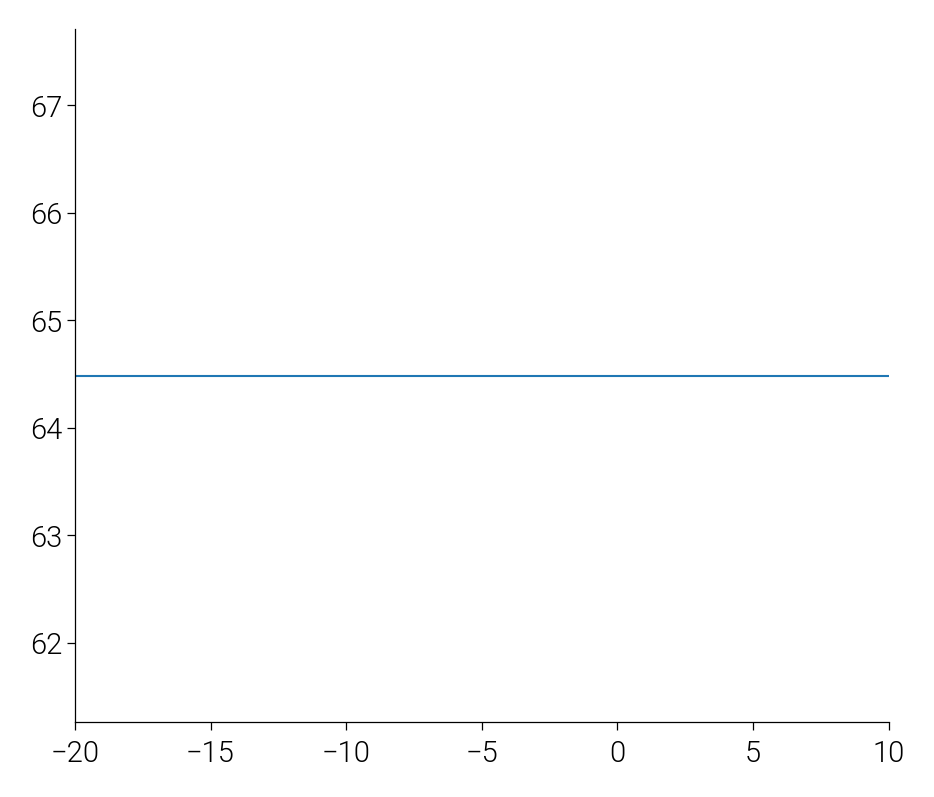

In [4]:
x = T0_range
y = Data['external unit']['E_fan']

plt.plot(x,y)
plt.show()

# Figure

## Figure setting

In [5]:
def fs_dict_update(fs):
    plt.rcParams['font.size'] = fs

    fs_dict = {
        'label': dm.fs(0),
        'tick': dm.fs(-1),
        'ctick': dm.fs(-2),
        'legend': dm.fs(-1.5),
        'annotation': dm.fs(-1),
                }
    return fs_dict

pad = {
    'label': 6,
    'tick': 4,
}

layout ={
    'bbox': (0.1, 0.1, 0.8, 0.8),
    'margins': (0, 0, 0, 0),
}

LW = np.arange(0.25, 3.0, 0.25)

## Figure function

In [6]:
def draw_plots(
    datas,
    plot_labels =None,
    ylabel = None,
    ymin=None,
    ymax=None,
    yint=None,
    line_colors = None,
    line_styles = None,
    annotations=None,
    fig_name=None,
    save=None,
    fs_dict = fs_dict_update(10)
):
    """
    Generates and displays a figure with two side-by-side heatmaps, each with its own colorbar.
    
    Most parameters have default values and can be omitted unless customization is needed.
    """
    # Set default values for optional parameters if they are not provided
    DL = len(datas)
    if plot_labels is None: plot_labels = [f"Data {i+1}" for i in range(DL)]
    if ylabel is None: ylabel = 'Y label'
    if ymax is None: ymax = np.max([np.max(d) for d in datas])
    if ymin is None: ymin = np.min([np.min(d) for d in datas])
    if yint is None: yint = (ymax-ymin)/5

    if line_colors is None: line_colors = ['dm.gray' + str(i) for i in range(DL)]
    if line_styles is None: line_styles = ['-' for _ in range(DL)]
    if annotations is None: annotations = ['(a)' for _ in range(DL)]
    if fig_name is None: fig_name = 'default_figure'
    if save is None: save = False
    
    # Plot ====================================================================================================
    nrows = 1
    ncols = 1

    fig, ax = plt.subplots(
        nrows, ncols, 
        sharex=True, sharey=True, 
        figsize=(dm.DW, dm.SW),  # 가로 두배
        squeeze=True,
    )

    # x축을 T_w_serv, y축을 T0로 변경
    xmin = np.min(T0_range)
    xmax = T0_range[-1]
    xint = 10
    xmar = 0

    ymar = 0

    for k in range(DL):
        ax.plot(
            T0_range,
            datas[k],
            label = plot_labels[k],
            color = line_colors[k],
            linestyle = line_styles[k],
            linewidth = LW[3],
            zorder = 10 + k,  # Ensure lines are drawn in the order they are added
        )
    dm.simple_layout(fig, bbox=[0.08, 0.99, 0.1, 0.95], margins=[0.0, 0.1, 0.05, 0.05])
    
    ax.set_xlabel('Environmental temperature [°C]', fontsize=fs_dict['label'], labelpad=pad['label'])
    ax.set_ylabel(ylabel, fontsize=fs_dict['label'], labelpad=pad['label'])

    ax.set_xlim(xmin - xmar, xmax + xmar)
    ax.set_ylim(ymin - ymar, ymax + ymar)
    
    ax.annotate(annotations, xy=(.01, 1.01), xycoords='axes fraction',
        horizontalalignment='left', verticalalignment='bottom', fontsize=fs_dict['annotation']) 
    
    ax.set_xticks(np.arange(xmin, xmax*1.001, xint))
    ax.set_yticks(np.arange(ymin, ymax*1.001, yint))
    
    ax.tick_params(direction='in', labelsize=fs_dict['tick'], which='major', length=2.5, width=0.5  , pad=pad['tick'])
    ax.tick_params(direction='in', labelsize=fs_dict['tick'], which='minor', length=1.25, width=0.25, pad=pad['tick'])
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
    ax.grid(False)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        labels,
        loc='upper left',
        fontsize=fs_dict['legend'],
        bbox_to_anchor=(0, 1),
        ncols=2,
        handlelength= 2,  # shorter handle
        handletextpad=0.6, # space between handle and text
        columnspacing=1.5, # space between columns
        borderaxespad=0.8  # padding around legend
    )

    save_path = 'figure/'
    
    if save:
        plt.savefig(save_path + fig_name + '.png', dpi=600)
        plt.savefig(save_path + fig_name + '.svg', transparent=True)
        
    dm.save_and_show(fig)
    plt.close()

## PLR

In [7]:
draw_plots(
    datas=[Data['whole']['PLR']],
    plot_labels=['PLR'],
    ylabel='PLR [-]',
    ymin=0,
    ymax=100,
    yint=20,
    line_colors=['dm.blue6'],
    line_styles=['-'],
    fig_name='ASHPB_COP&PLR_plots',
    annotations=' ',
    save=False
)

## COP

In [8]:
draw_plots(
    datas=[Data['whole']['COP']],
    plot_labels=['COP'],
    ylabel='COP [-]',
    ymin=0,
    ymax=10,
    yint=2,
    line_colors=['dm.green6'],
    line_styles=['-'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

## Temperature

In [9]:
T_w_serv
draw_plots(datas=[
           Data['temp']['T0'],
           Data['temp']['T_w_sup'],
           Data['temp']['T_w_serv'],
           Data['temp']['T_w_HX'],
           Data['temp']['T_ref_HX'],],
    plot_labels=['T0', 'T_w_sup','T_w_serv', 'T_w_HX', 'T_ref_HX'],
    ylabel='Temperature [°C]',
    ymin=-20,
    ymax=80,
    yint=20,
    line_colors=['dm.blue6','dm.lime6','dm.red6','dm.green6','dm.yellow6'],
    line_styles=['-.','-','-.',':', '--'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

## Exergy In Out

### External unit

In [10]:
T_w_serv
draw_plots(datas=[
           Data['external unit']['X_a_ext_out'],
           Data['external unit']['X_a_ext_in'],
        #    Data['external unit']['E_fan'],
           ],
    plot_labels=['X_a_ext_out', 'X_a_ext_in', 'E_fan'],
    ylabel='Exergy (external unit) [W]',
    ymin=0,
    ymax=120,
    yint=20,
    line_colors=['dm.blue6','dm.lime6','dm.red6','dm.green6','dm.yellow6'],
    line_styles=['-.','-','-.',':', '--'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

### Refrigerant

In [38]:
T_w_serv
draw_plots(datas=[
           Data['refrigerant']['E_cmp'],
           Data['refrigerant']['X_ref_ext'],
           Data['refrigerant']['X_ref_HX'],
           Data['refrigerant']['X_c_r'],
           ],
    plot_labels=['X_cmp', 'X_ref_ext', 'X_ref_HX', 'X_c_ref'],
    ylabel='Exergy (refrigerant) [W]',
    ymin=0,
    ymax=6000,
    yint=2000,
    line_colors=['dm.lime6', 'dm.blue6', 'dm.red6', 'dm.violet6', 'dm.yellow6'],
    line_styles=['-','-','-','-', '--'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

In [12]:
T_w_serv
draw_plots(datas=[
           Data['refrigerant']['E_cmp']-Data['refrigerant']['X_ref_ext']-Data['refrigerant']['X_ref_HX']
           ],
    plot_labels=['X_cmp - X_ref_ext - X_ref_HX'],
    ylabel='Exergy (refrigerant) [W]',
    ymin=0,
    ymax=12000,
    yint=2000,
    line_colors=['dm.blue6','dm.lime6','dm.red6','dm.green6','dm.yellow6'],
    line_styles=['-.','-','-.',':', '--'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

### Heat exchanger

In [13]:
draw_plots(datas=[
           Data['heat exchanger']['X_w_HX'],
           Data['heat exchanger']['X_w_sup_HX'],
           ],
    plot_labels=['X_w_HX', 'X_w_sup_HX'],
    ylabel='Exergy (heat exchanger) [W]',
    ymin=0,
    ymax=4000,
    yint=1000,
    line_colors=['dm.blue6','dm.lime6','dm.red6','dm.green6','dm.yellow6'],
    line_styles=['-.','-','-.',':', '--'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

### Mixing valve

In [14]:
draw_plots(datas=[
           Data['mixing valve']['X_w_HX'],
           Data['mixing valve']['X_w_sup_mix'],
           Data['mixing valve']['X_w_serv'],
           ],
    plot_labels=['X_w_HX', 'X_w_sup_mix', 'X_w_serv'],
    ylabel='Exergy (mixing valve) [W]',
    ymin=0,
    ymax=4000,
    yint=1000,
    line_colors=['dm.blue6','dm.lime6','dm.red6','dm.green6','dm.yellow6'],
    line_styles=['-.','-','-.',':', '--'],
    annotations=' ',
    fig_name='ASHPB_COP&PLR_plots',
    save=False
)

## COP & PLR

In [31]:
fs_dict = fs_dict_update(9)
fig, ax1 = plt.subplots(figsize=(dm.cm2in(10), dm.cm2in(6)))

color1 = 'dm.green'
color2 = 'dm.blue'

# 첫 번째 데이터: Energy efficiency
ax1.plot(T0_range, Data['whole']['COP'], color=color1 + '4', label='Coefficient of performance', linewidth=LW[3])

# 두 번째 데이터: Exergy efficiency
ax2 = ax1.twinx()
ax2.plot(T0_range, Data['whole']['PLR'], color=color2 + '4', label='Part load ratio', linewidth=LW[3])

# fill_between: 두 축의 값을 같은 축에서 그려야 하므로, 보조축(ax2) 데이터를 ax1의 축에 맞게 변환 필요
# 여기서는 단순히 두 곡선 사이를 채우는 시각적 효과를 위해, 두 곡선을 같은 축(ax1)에 임시로 그려서 fill_between 사용
# ax1.fill_between(T0_range, Data['whole']['En_eff'], 0, color=color1, alpha=0.3)
# ax2.fill_between(T0_range, Data['whole']['Ex_eff'], 0, color=color2, alpha=0.3)

# 최고점 위치에 수직선 추가
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])
max_en_x = T0_range[max_en_idx]
max_ex_x = T0_range[max_ex_idx]
max_en_y = Data['whole']['En_eff'][max_en_idx]
max_ex_y = Data['whole']['Ex_eff'][max_ex_idx]

print('max_en_eff_T0:', round(max_en_x,1))
print('max_ex_eff_T0:', round(max_ex_x,1))

ymin1, ymax1, yint1 = 0, 6, 1
ymin2, ymax2, yint2 = 50, 80, 5

# ss = 30  # scatter size
# ax1.scatter(max_en_x, max_en_y, s=ss, color=color1, edgecolor='white', linewidth=LW[3], zorder=5)
# ax2.scatter(max_ex_x, max_ex_y, s=ss, color=color2, edgecolor='white', linewidth=LW[3], zorder=5)

ax1.set_xlabel('Environmental temperature [°C]', fontsize=fs_dict['label'], labelpad=pad['label'], fontweight=360)
ax1.set_ylabel('Coefficient of performance [-]', color=color1+'8', fontsize=fs_dict['label'], labelpad=pad['label'], fontweight=360)
ax2.set_ylabel('Part load ratio [%]', color=color2, fontsize=fs_dict['label'], labelpad=pad['label'], fontweight=360)

ax1.tick_params(axis='x', colors='k', labelsize=fs_dict['tick'], pad=pad['tick'])
ax1.tick_params(axis='y', colors=color1+'8', labelsize=fs_dict['tick'], pad=pad['tick'])
ax2.tick_params(axis='y', colors=color2, labelsize=fs_dict['tick'], pad=pad['tick'])

ax1.set_xlim(np.min(T0_range), T0_range[-1])
ax1.set_ylim(ymin1, ymax1)

ax1.set_xticks(np.arange(np.min(T0_range), T0_range[-1]+1, 5))
ax1.set_yticks(np.arange(ymin1, ymax1+1, yint1))

ax2.set_ylim(ymin2, ymax2)
ax2.set_yticks(np.arange(ymin2, ymax2+1, yint2))

# --- 이제 축 한계가 정해졌으니, 수직선을 '점까지' 제한 ---
ymin1, ymax1 = ax1.get_ylim()
ymin2, ymax2 = ax2.get_ylim()

# 각 축에서 최대 y가 차지하는 비율(0~1)
# frac_en = (max_en_y - ymin1) / (ymax1 - ymin1)
# frac_ex = (max_ex_y - ymin2) / (ymax2 - ymin2)

# 수직선: 점까지 그리되, zorder는 scatter보다 낮게
# ax1.axvline(x=max_en_x, ymin=0.0, ymax=frac_en, color=color1, linestyle='--', linewidth=LW[2], zorder=2)
# ax2.axvline(x=max_ex_x, ymin=0.0, ymax=frac_ex, color=color2, linestyle='--', linewidth=LW[2], zorder=2)

for k in ['left', 'top','bottom']:
    ax2.spines[k].set_visible(False)
ax2.spines['right'].set_visible(True)

# spine color
ax1.spines['left'].set_color(color1+'8')
ax2.spines['right'].set_color(color2)

# 범례 추가
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper left',
    fontsize=fs_dict['legend'],
    bbox_to_anchor=(0, 1.05),
    ncols=1,
    handlelength= 2,  # shorter handle
    handletextpad=0.6, # space between handle and text
    columnspacing=1.5, # space between columns
    borderaxespad=0.8  # padding around legend
)

print('-20 °C에서의 PLR:', round(Data['whole']['PLR'][0], 2), '%')
print('10 °C에서의 COP:', round(Data['whole']['COP'][0], 2),)
print('')
print('-20 °C에서의 PLR:', round(Data['whole']['PLR'][-1], 1), '%')
print('10 °C에서의 COP:', round(Data['whole']['COP'][-1], 1),)

dm.simple_layout(fig, bbox=[0.01, 0.99, 0.01, 1.0], margins=[0.0, 0.0, 0.05, 0.05])
plt.savefig('figure/PLR&COP.svg', transparent=True)
plt.savefig('figure/PLR&COP.png',dpi=600)
dm.save_and_show(fig)
plt.close()

max_en_eff_T0: 6.4
max_ex_eff_T0: -13.0
-20 °C에서의 PLR: 71.16 %
10 °C에서의 COP: 2.45

-20 °C에서의 PLR: 58.6 %
10 °C에서의 COP: 4.6


## System energy, exergy efficiency

In [28]:
fs_dict = fs_dict_update(9)
fig, ax1 = plt.subplots(figsize=(dm.cm2in(13), dm.cm2in(6)))

color1 = 'dm.gray6'
color2 = 'dm.red6'

# 첫 번째 데이터: Energy efficiency
ax1.plot(T0_range, Data['whole']['En_eff'], color=color1, label='Energy efficiency', linewidth=LW[3])

# 두 번째 데이터: Exergy efficiency
ax2 = ax1.twinx()
ax2.plot(T0_range, Data['whole']['Ex_eff'], color=color2, label='Exergy efficiency', linewidth=LW[3])

# fill_between: 두 축의 값을 같은 축에서 그려야 하므로, 보조축(ax2) 데이터를 ax1의 축에 맞게 변환 필요
# 여기서는 단순히 두 곡선 사이를 채우는 시각적 효과를 위해, 두 곡선을 같은 축(ax1)에 임시로 그려서 fill_between 사용
# ax1.fill_between(T0_range, Data['whole']['En_eff'], 0, color=color1, alpha=0.3)
# ax2.fill_between(T0_range, Data['whole']['Ex_eff'], 0, color=color2, alpha=0.3)

# 최고점 위치에 수직선 추가
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])
max_en_x = T0_range[max_en_idx]
max_ex_x = T0_range[max_ex_idx]
max_en_y = Data['whole']['En_eff'][max_en_idx]
max_ex_y = Data['whole']['Ex_eff'][max_ex_idx]

print('max_en_eff_T0:', round(max_en_x,1))
print('max_ex_eff_T0:', round(max_ex_x,1))

ymin1, ymax1, yint1 = 1000, 1300, 100
ymin2, ymax2, yint2 = 0, 100, 10

ss = 30  # scatter size
ax1.scatter(max_en_x, max_en_y, s=ss, color=color1, edgecolor='white', linewidth=LW[3], zorder=5)
ax2.scatter(max_ex_x, max_ex_y, s=ss, color=color2, edgecolor='white', linewidth=LW[3], zorder=5)

ax1.set_xlabel('Environmental temperature [°C]', fontsize=fs_dict['label'], labelpad=pad['label'], fontweight=400)
ax1.set_ylabel('System energy efficiency [%]', color='dm.gray9', fontsize=fs_dict['label'], labelpad=pad['label'], fontweight=400)

ax1.tick_params(axis='x', colors='k', labelsize=fs_dict['tick'], pad=pad['tick'])
ax1.tick_params(axis='y', colors='dm.gray9', labelsize=fs_dict['tick'], pad=pad['tick'])

ax1.set_xlim(np.min(T0_range), T0_range[-1])
ax1.set_ylim(ymin1, ymax1)

ax1.set_xticks(np.arange(np.min(T0_range), T0_range[-1]+1, 5))
ax1.set_yticks(np.arange(ymin1, ymax1+1, yint1))

ax2.set_ylabel('System exergy efficiency [%]', color=color2, fontsize=fs_dict['label'], labelpad=pad['label'], fontweight=400)
ax2.tick_params(axis='y', colors=color2, labelsize=fs_dict['tick'], pad=pad['tick'])
ax2.set_ylim(ymin2, ymax2)
ax2.set_yticks(np.arange(ymin2, ymax2+1, yint2))

# --- 이제 축 한계가 정해졌으니, 수직선을 '점까지' 제한 ---
ymin1, ymax1 = ax1.get_ylim()
ymin2, ymax2 = ax2.get_ylim()

# 각 축에서 최대 y가 차지하는 비율(0~1)
frac_en = (max_en_y - ymin1) / (ymax1 - ymin1)
frac_ex = (max_ex_y - ymin2) / (ymax2 - ymin2)

# 수직선: 점까지 그리되, zorder는 scatter보다 낮게
ax1.axvline(x=max_en_x, ymin=0.0, ymax=frac_en, color=color1, linestyle='--', linewidth=LW[2], zorder=2)
ax2.axvline(x=max_ex_x, ymin=0.0, ymax=frac_ex, color=color2, linestyle='--', linewidth=LW[2], zorder=2)

for k in ['left', 'top','bottom']:
    ax2.spines[k].set_visible(False)
ax2.spines['right'].set_visible(True)

# spine color
ax1.spines['left'].set_color('dm.gray9')
ax2.spines['right'].set_color(color2)

# 범례 추가
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper left',
    fontsize=fs_dict['legend'],
    bbox_to_anchor=(0, 1.05),
    ncols=1,
    handlelength= 2,  # shorter handle
    handletextpad=0.6, # space between handle and text
    columnspacing=1.5, # space between columns
    borderaxespad=0.8  # padding around legend
)

print('에너지 최대 효율 지점에서의 에너지 효율:', round(Data['whole']['En_eff'][max_en_idx], 1), '%')
print('에너지 최대 효율 지점에서의 엑서지 효율:', round(Data['whole']['Ex_eff'][max_en_idx], 1), '%')
print('')
print('엑서지 최대 효율 지점에서의 에너지 효율:', round(Data['whole']['En_eff'][max_ex_idx], 1), '%')
print('엑서지 최대 효율 지점에서의 엑서지 효율:', round(Data['whole']['Ex_eff'][max_ex_idx], 1), '%')


dm.simple_layout(fig, bbox=[0.01, 0.99, 0.01, 1.0], margins=[0.0, 0.1, 0.05, 0.05])
plt.savefig('figure/ASHPB_en_ex_eff_comparison.svg', transparent=True)
plt.savefig('figure/ASHPB_en_ex_eff_comparison.png',dpi=600)
dm.save_and_show(fig)
plt.close()

max_en_eff_T0: 6.4
max_ex_eff_T0: -13.0
에너지 최대 효율 지점에서의 에너지 효율: 1266.3 %
에너지 최대 효율 지점에서의 엑서지 효율: 70.6 %

엑서지 최대 효율 지점에서의 에너지 효율: 1049.7 %
엑서지 최대 효율 지점에서의 엑서지 효율: 94.4 %


## Subsystem exergy efficiency

In [30]:
fs_dict = fs_dict_update(12)

# label
xlabel = 'Environmental temperature [°C]'
ylabel = 'Exergy efficiency [%]'

#
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])
max_en_x = T0_range[max_en_idx]
max_ex_x = T0_range[max_ex_idx]

# min max
xmin = -20; xmax = 10; xint = 10; xmar = 0
ymin = 0; ymax = 200; yint = 20; ymar = 0 

# 1) Figure & GridSpec 만들기
fig = plt.figure(figsize=(dm.DW, dm.cm2in(8)))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.1, right=0.95, top=0.9, bottom=0.15, hspace=0.2, wspace=0.25)

# 2) 서브플롯(axes) 생성
ax = fig.add_subplot(gs[0, 0])  # 좌상

# 3) (선택) 기본 제목/격자 등 틀만 잡아두기
ax.grid(True, linestyle = ':', linewidth = LW[1], color = 'dm.gray3')  # 보기 좋게 격자만 켜둠

# 4) plot
plot1 = ax.plot(T0_range, Data['external unit']['X_eff'], color='dm.lime6', label='external unit', linewidth=LW[3])
plot2 = ax.plot(T0_range, Data['refrigerant']['X_eff'], color='dm.blue6', label='refrigerant', linewidth=LW[3])
plot3 = ax.plot(T0_range, Data['heat exchanger']['X_eff'], color='dm.red6', label='heat exchanger', linewidth=LW[3])
plot4 = ax.plot(T0_range, Data['mixing valve']['X_eff'], color='dm.orange6', label='mixing valve', linewidth=LW[3])

ax.axvline(x=max_en_x, ymin=0.0, ymax=1.0, color='dm.gray6', linestyle='--', linewidth=LW[1], zorder=2)
ax.axvline(x=max_ex_x, ymin=0.0, ymax=1.0, color='dm.gray6', linestyle='--', linewidth=LW[1], zorder=2)

ss = 20 # scatter size
selw = LW[2] # scatter edge line width
ax.scatter(max_en_x, Data['external unit']['X_eff'][max_en_idx], s=ss, color='dm.lime6', edgecolor='white', linewidth=selw, zorder=5)
ax.scatter(max_en_x, Data['refrigerant']['X_eff'][max_en_idx], s=ss, color='dm.blue6', edgecolor='white', linewidth=selw, zorder=5)
ax.scatter(max_en_x, Data['heat exchanger']['X_eff'][max_en_idx], s=ss, color='dm.red6', edgecolor='white', linewidth=selw, zorder=5)
ax.scatter(max_en_x, Data['mixing valve']['X_eff'][max_en_idx], s=ss, color='dm.orange6', edgecolor='white', linewidth=selw, zorder=5)

ax.scatter(max_ex_x, Data['external unit']['X_eff'][max_ex_idx], s=ss, color='dm.lime6', edgecolor='white', linewidth=selw, zorder=5)
ax.scatter(max_ex_x, Data['refrigerant']['X_eff'][max_ex_idx], s=ss, color='dm.blue6', edgecolor='white', linewidth=selw, zorder=5)
ax.scatter(max_ex_x, Data['heat exchanger']['X_eff'][max_ex_idx], s=ss, color='dm.red6', edgecolor='white', linewidth=selw, zorder=5)
ax.scatter(max_ex_x, Data['mixing valve']['X_eff'][max_ex_idx], s=ss, color='dm.orange6', edgecolor='white', linewidth=selw, zorder=5)

# 5) plot detail
ax.set_xlabel('Environmental temperature [°C]', fontsize=fs_dict['label'], labelpad=pad['label'])
ax.set_ylabel(ylabel, fontsize=fs_dict['label'], labelpad=pad['label'])

ax.set_xlim(xmin - xmar, xmax + xmar)
ax.set_ylim(ymin - ymar, ymax + ymar)

# ax.annotate(annotations, xy=(.01, 1.01), xycoords='axes fraction',
#     horizontalalignment='left', verticalalignment='bottom', fontsize=fs_dict['annotation']) 

ax.set_xticks(np.arange(xmin, xmax*1.001, xint))
ax.set_yticks(np.arange(ymin, ymax*1.001, yint))

ax.tick_params(direction='in', labelsize=fs_dict['tick'], which='major', length=2.5, width=0.5  , pad=pad['tick'])
ax.tick_params(direction='in', labelsize=fs_dict['tick'], which='minor', length=1.25, width=0.25, pad=pad['tick'])

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower center', fontsize=fs_dict['legend'], bbox_to_anchor=(0.5, 1), ncols=4,
          handlelength = 1.5, columnspacing=2)

plt.savefig('figure/ASHPB_subsystem_ex_eff.svg', transparent=True)
plt.savefig('figure/ASHPB_subsystem_ex_eff.png',dpi=600)
dm.save_and_show(fig)
plt.close()

## Subsystem energy results

In [18]:
# --- Your original setup code ---
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])
max_en_x = T0_range[max_en_idx]
max_ex_x = T0_range[max_ex_idx]

fs_dict = fs_dict_update(9)
W2kW = 1/1000

# NEW: Create a dictionary to store output strings before printing
print_output = {
    "(a) External unit": [],
    "(b) Refrigerant": [],
    "(c) Heat exchanger": [],
    "(d) Mixing valve": []
}

# 0) min max
ymin = [-16, 0, 0, 0]
ymax = [16, 20, 30, 40]
yint = [8, 5, 10, 10]

# 1) Figure & GridSpec 만들기
fig = plt.figure(figsize=(dm.DW, dm.cm2in(10)))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.07, right=0.96, top=0.95, bottom=0.1, hspace=0.4, wspace=0.2)

# 2) 서브플롯(axes) 생성
ax1 = fig.add_subplot(gs[0, 0])  # 좌상
ax2 = fig.add_subplot(gs[0, 1])  # 우상
ax3 = fig.add_subplot(gs[1, 0])  # 좌하
ax4 = fig.add_subplot(gs[1, 1])  # 우하

for i, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.axvline(x=max_en_x, ymin=0.0, ymax=1.0, color='dm.gray9', linestyle='--', linewidth=LW[1], zorder=2)
    ax.axvline(x=max_ex_x, ymin=0.0, ymax=1.0, color='dm.red6', linestyle='--', linewidth=LW[1], zorder=2)

ss = 10 # scatter size
selw = LW[1] # scatter edge line width

# --- Loop for ax1: Store data for later printing ---
key = "(a) External unit"
# CORRECTED: Matched list lengths (4 items each) for zip to work correctly.
for data, col, label, ls in zip([Data['external unit']['Q_a_ext_in'], Data['external unit']['E_fan'], Data['external unit']['Q_ref_ext'], Data['external unit']['Q_a_ext_out']],
                                 ['dm.green4', 'dm.green4', 'dm.orange4', 'dm.orange4'],
                                 ['$Q_{a,ext,in}$', '$E_{fan}$', '$Q_{r,ext}$', '$Q_{a,ext,out}$'],
                                 ['-', ':', '-', ':']):
    ax1.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax1.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax1.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Loop for ax2: Store data for later printing ---
key = "(b) Refrigerant"
# CORRECTED: Matched list lengths (3 items each).
for data, col, label, ls in zip([Data['refrigerant']['E_cmp'], Data['refrigerant']['Q_ref_ext'], Data['refrigerant']['Q_ref_HX']],
                                 ['dm.green4', 'dm.green4', 'dm.orange4'],
                                 ['$E_{cmp}$', '$Q_{r,ext}$', '$Q_{r,HX}$'],
                                 ['-', ':', '-']):
    ax2.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax2.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax2.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Loop for ax3: Store data for later printing ---
key = "(c) Heat exchanger"
# CORRECTED: Matched list lengths (3 items each).
for data, col, label, ls in zip([Data['heat exchanger']['Q_ref_HX'], Data['heat exchanger']['Q_w_sup_HX'], Data['heat exchanger']['Q_w_HX']],
                                  ['dm.green4', 'dm.green4', 'dm.orange4'],
                                  ['$Q_{r,HX}$', '$Q_{w,sup,HX}$', '$Q_{w,HX}$'],
                                  ['-', ':', '-']):
    ax3.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax3.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax3.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Loop for ax4: Store data for later printing ---
key = "(d) Mixing valve"
# CORRECTED: Matched list lengths (3 items each).
for data, col, label, ls in zip([Data['mixing valve']['Q_w_HX'], Data['mixing valve']['Q_w_sup_mix'], Data['mixing valve']['Q_w_serv']],
                                  ['dm.green4', 'dm.green4', 'dm.orange4'],
                                  ['$Q_{w,HX}$', '$Q_{w,sup,mix}$', '$Q_{w,serv}$'],
                                  ['-', ':', '-']):
    ax4.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax4.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax4.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Your original figure formatting and saving code ---
an_head = ['a', 'b', 'c', 'd']
an_main = ['External unit', 'Refrigerant', 'Ref-to-water heat exchanger', 'Mixing valve']

for i, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.annotate(an_head[i], xy=(0, 1.04), xycoords='axes fraction',
                fontsize= fs_dict['annotation']+1, ha='left', va='bottom', fontweight = 700)
    ax.annotate(an_main[i], xy=(0.045, 1.04), xycoords='axes fraction',
                fontsize=fs_dict['annotation'], ha='left', va='bottom')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', fontsize=fs_dict['legend'], bbox_to_anchor=(1, 1), ncols=6,
        handlelength = 1.2, columnspacing=1, )

    ymar = (ymax[i] - ymin[i]) / 30
    ax.set_ylim(ymin[i] - ymar, ymax[i])
    ax.set_yticks(np.arange(ymin[i], ymax[i]*1.001, yint[i]))
    ax.tick_params(axis='both', which='major', labelsize=fs_dict['tick'])

fig.supxlabel("Environmental temperature [°C]", fontsize=fs_dict['label'], y = 0.005, fontweight = 400)
# ax4.set_xlabel("Environmental temperature [°C]", fontsize=fs_dict['label'], labelpad=pad['label'], fontweight = 400)
fig.supylabel("Energy rate [kW]", fontsize=fs_dict['label'], x = 0.005, fontweight = 400)

for ax in (ax1, ax2, ax3, ax4):
    ax.set_axisbelow(True)
    # ax.grid(True, linestyle=':', linewidth=LW[1], color='dm.gray3', zorder = 0)

# plt.show()
plt.savefig('figure/ASHPB_subsystem_en_in_out.svg', transparent=True)
plt.savefig('figure/ASHPB_subsystem_en_in_out.png',dpi=600)
dm.save_and_show(fig)
plt.close()

# --- NEW: Print all stored information at the very end ---
print("--- Scatter Point Data Summary ---")
for subplot_title, lines in print_output.items():
    print(f"\n--- Subplot {subplot_title} ---")
    for line in lines:
        print(line)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


--- Scatter Point Data Summary ---

--- Subplot (a) External unit ---
Q_{a,ext,in}    -> Max En Eff Point: ( 6.36, 0.0000), Max Ex Eff Point: (-13.03, 0.0000)
E_{fan}         -> Max En Eff Point: ( 6.36, 0.0645), Max Ex Eff Point: (-13.03, 0.0645)
Q_{r,ext}       -> Max En Eff Point: ( 6.36, 9.2334), Max Ex Eff Point: (-13.03, 9.2334)
Q_{a,ext,out}   -> Max En Eff Point: ( 6.36, -9.2334), Max Ex Eff Point: (-13.03, -9.2334)

--- Subplot (b) Refrigerant ---
E_{cmp}         -> Max En Eff Point: ( 6.36, 1.3254), Max Ex Eff Point: (-13.03, 2.5789)
Q_{r,ext}       -> Max En Eff Point: ( 6.36, 9.2334), Max Ex Eff Point: (-13.03, 9.2334)
Q_{r,HX}        -> Max En Eff Point: ( 6.36, 15.0315), Max Ex Eff Point: (-13.03, 17.0611)

--- Subplot (c) Heat exchanger ---
Q_{r,HX}        -> Max En Eff Point: ( 6.36, 15.0315), Max Ex Eff Point: (-13.03, 17.0611)
Q_{w,sup,HX}    -> Max En Eff Point: ( 6.36, 2.1879), Max Ex Eff Point: (-13.03, 9.2661)
Q_{w,HX}        -> Max En Eff Point: ( 6.36, 17.2194),

## Subsystem exergy results

In [19]:

# --- Your original setup code ---
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])
max_en_x = T0_range[max_en_idx]
max_ex_x = T0_range[max_ex_idx]

fs_dict = fs_dict_update(9)
W2kW = 1/1000

# 0) min max
ymin = [0, 0, 0, 0]
ymax = [0.8, 12, 4, 4]
yint = [0.2, 3, 1, 1]

# NEW: Create a dictionary to store output strings before printing
print_output = {
    "(a) External unit": [],
    "(b) Refrigerant": [],
    "(c) Heat exchanger": [],
    "(d) Mixing valve": []
}

# 1) Figure & GridSpec 만들기
fig = plt.figure(figsize=(dm.DW, dm.cm2in(10)))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.07, right=0.96, top=0.95, bottom=0.1, hspace=0.4, wspace=0.2)

# 2) 서브플롯(axes) 생성
ax1 = fig.add_subplot(gs[0, 0])  # 좌상
ax2 = fig.add_subplot(gs[0, 1])  # 우상
ax3 = fig.add_subplot(gs[1, 0])  # 좌하
ax4 = fig.add_subplot(gs[1, 1])  # 우하

for i, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.axvline(x=max_en_x, ymin=0.0, ymax=1.0, color='dm.gray6', linestyle='--', linewidth=LW[1], zorder=2)
    ax.axvline(x=max_ex_x, ymin=0.0, ymax=1.0, color='dm.red6', linestyle='--', linewidth=LW[1], zorder=2)


ss = 10
selw = LW[1]

# --- Loop for ax1: Store data for later printing ---
key = "(a) External unit"
for data, col, label, ls in zip([Data['external unit']['X_a_ext_in'], Data['external unit']['X_ref_ext'], Data['external unit']['E_fan'], Data['external unit']['X_a_ext_out'], Data['external unit']['X_c_ext']],
                                 ['dm.green4', 'dm.green4', 'dm.green4', 'dm.orange4', 'dm.violet4'],
                                 ['$X_{a,ext,in}$', '$X_{r,ext}$', '$X_{fan}$', '$X_{a,ext,out}$', '$X_{c,ext}$'],
                                 ['-', ':', '-.', '-', '-']):
    ax1.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax1.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax1.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary instead of printing
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Loop for ax2: Store data for later printing ---
key = "(b) Refrigerant"
for data, col, label, ls in zip([Data['refrigerant']['E_cmp'], Data['refrigerant']['X_ref_ext'], Data['refrigerant']['X_ref_HX'], Data['refrigerant']['X_c_r']],
                                 ['dm.green4', 'dm.orange4', 'dm.orange4', 'dm.violet4'],
                                 ['$X_{cmp}$', '$X_{r,ext}$', '$X_{r,HX}$', '$X_{c,r}$'],
                                 ['-', '-', ':', '-']):
    ax2.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax2.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax2.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Loop for ax3: Store data for later printing ---
key = "(c) Heat exchanger"
for data, col, label, ls in zip([Data['heat exchanger']['X_w_sup_HX'], Data['heat exchanger']['X_ref_HX'], Data['heat exchanger']['X_w_HX'], Data['heat exchanger']['X_c_HX']],
                                  ['dm.green4', 'dm.green4', 'dm.orange4', 'dm.violet4'],
                                  ['$X_{w,sup,HX}$', '$X_{r,HX}$', '$X_{w,HX}$', '$X_{c,HX}$'],
                                  ['-', ':', '-', '-']):
    ax3.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax3.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax3.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Loop for ax4: Store data for later printing ---
key = "(d) Mixing valve"
for data, col, label, ls in zip([Data['mixing valve']['X_w_HX'], Data['mixing valve']['X_w_sup_mix'], Data['mixing valve']['X_w_serv'], Data['mixing valve']['X_c_mix']],
                                  ['dm.green4', 'dm.green4', 'dm.orange4', 'dm.violet4'],
                                  ['$X_{w,HX}$', '$X_{w,sup,mix}$', '$X_{w,serv}$', '$X_{c,mix}$'],
                                  ['-', ':', '-', '-']):
    ax4.plot(T0_range, data*W2kW, color=col, label=label, linewidth=LW[2], linestyle=ls)
    en_y_val = data[max_en_idx]*W2kW
    ex_y_val = data[max_ex_idx]*W2kW
    ax4.scatter(max_en_x, en_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    ax4.scatter(max_ex_x, ex_y_val, s=ss, color=col, edgecolor='white', linewidth=selw, zorder=5)
    # NEW: Format string and add to dictionary
    output_string = f"{label.replace('$', ''):<15} -> Max En Eff Point: ({max_en_x:>5.2f}, {en_y_val:.4f}), Max Ex Eff Point: ({max_ex_x:>5.2f}, {ex_y_val:.4f})"
    print_output[key].append(output_string)

# --- Your original figure formatting and saving code ---
an_head = ['a', 'b', 'c', 'd']
an_main =['External unit', 'Refrigerant', 'Ref-to-water heat exchanger', 'Mixing valve']

for i, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.annotate(an_head[i], xy=(0, 1.04), xycoords='axes fraction',
                fontsize= fs_dict['annotation']+1, ha='left', va='bottom', fontweight = 700)
    ax.annotate(an_main[i], xy=(0.045, 1.04), xycoords='axes fraction',
                fontsize=fs_dict['annotation'], ha='left', va='bottom')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', fontsize=fs_dict['legend'], bbox_to_anchor=(1, 1), ncols=6,
        handlelength = 1.2, columnspacing=1)

    ymar = (ymax[i] - ymin[i]) / 30
    ax.set_ylim(ymin[i] - ymar, ymax[i])
    ax.set_yticks(np.arange(ymin[i], ymax[i]*1.001, yint[i]))
    ax.tick_params(axis='both', which='major', labelsize=fs_dict['tick'])

fig.supxlabel("Environmental temperature [°C]", fontsize=fs_dict['label'], y = 0.005, fontweight = 400)
# ax4.set_xlabel("Environmental temperature [°C]", fontsize=fs_dict['label'], labelpad=pad['label'], fontweight = 400)
fig.supylabel("Exergy rate [kW]", fontsize=fs_dict['label'], x = 0.005, fontweight = 400)

for ax in (ax1, ax2, ax3, ax4):
    ax.set_axisbelow(True)
    # ax.grid(True, linestyle=':', linewidth=LW[1], color='dm.gray3', zorder = 0)

# plt.show()
plt.savefig('figure/ASHPB_subsystem_ex_in_out.svg', transparent=True)
plt.savefig('figure/ASHPB_subsystem_ex_in_out.png',dpi=600)
dm.save_and_show(fig)
plt.close()

# --- NEW: Print all stored information at the very end ---
print("--- Scatter Point Data Summary ---")
for subplot_title, lines in print_output.items():
    print(f"\n--- Subplot {subplot_title} ---")
    for line in lines:
        print(line)

--- Scatter Point Data Summary ---

--- Subplot (a) External unit ---
X_{a,ext,in}    -> Max En Eff Point: ( 6.36, 0.0000), Max Ex Eff Point: (-13.03, 0.0000)
X_{r,ext}       -> Max En Eff Point: ( 6.36, 0.3426), Max Ex Eff Point: (-13.03, 0.3692)
X_{fan}         -> Max En Eff Point: ( 6.36, 0.0645), Max Ex Eff Point: (-13.03, 0.0645)
X_{a,ext,out}   -> Max En Eff Point: ( 6.36, 0.0836), Max Ex Eff Point: (-13.03, 0.0899)
X_{c,ext}       -> Max En Eff Point: ( 6.36, 0.2590), Max Ex Eff Point: (-13.03, 0.2793)

--- Subplot (b) Refrigerant ---
X_{cmp}         -> Max En Eff Point: ( 6.36, 1.3254), Max Ex Eff Point: (-13.03, 2.5789)
X_{r,ext}       -> Max En Eff Point: ( 6.36, 0.3426), Max Ex Eff Point: (-13.03, 0.3692)
X_{r,HX}        -> Max En Eff Point: ( 6.36, 2.0298), Max Ex Eff Point: (-13.03, 3.3278)
X_{c,r}         -> Max En Eff Point: ( 6.36, 3.4257), Max Ex Eff Point: (-13.03, 4.1308)

--- Subplot (c) Heat exchanger ---
X_{w,sup,HX}    -> Max En Eff Point: ( 6.36, 0.0190), Max Ex

## Energy and Exergy rate comparison

### Q_w_serv

In [20]:
fs_dict = fs_dict_update(9)
# 1. 각 효율 최대점에서의 인덱스 찾기
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])

# 2. 해당 인덱스에서 값 추출 (단위: kW)
Q_w_serv_en_max = Data['mixing valve']['Q_w_serv'][max_en_idx] * W2kW
Q_w_serv_ex_max = Data['mixing valve']['Q_w_serv'][max_ex_idx] * W2kW
X_w_serv_en_max = Data['mixing valve']['X_w_serv'][max_en_idx] * W2kW
X_w_serv_ex_max = Data['mixing valve']['X_w_serv'][max_ex_idx] * W2kW

# 3. 데이터 준비
labels = ['$Q_{w,serv}$', '$X_{w,serv}$']
values = [(Q_w_serv_en_max, Q_w_serv_ex_max), (X_w_serv_en_max, X_w_serv_ex_max)]
colors = ['dm.gray6', 'dm.red6'] # dm.gray6, dm.red6에 해당하는 표준 색상

# --- 설정 변수 (사용자 지정 영역) ---
ymax =[30, 2.5]  # Y축 최대값
ymin = [0, 0]  # Y축 최소값
yint = [5, 0.5]  # Y축 간격

# 4. 그래프 생성
# fig, ax = plt.subplots(figsize=(dm.cm2in(12), dm.cm2in(8))) # 사용자 모듈 대신 표준 figsize 사용
nrows = 1
ncols = 2
fig = plt.figure(figsize=(dm.cm2in(12), dm.cm2in(8)))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0.1, right=0.97, top=0.88, bottom=0.05, hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

axs = [ax1, ax2]  # 서브플롯들을 리스트로 관리

# 막대 그래프 그리기
bars = []
xmar = 0.2
bar_thick = 0.3
bar_gap = 0.1
n_groups = len(labels)
x_pos = np.array([i * (bar_thick + bar_gap) for i in range(n_groups)])  # 막대 그래프의 x 위치

# for x, label, (en_val, ex_val) in zip(x_pos, labels, values):
for ridx in range(nrows):
    for cidx in range(ncols):
        idx = ridx * ncols + cidx
        axs[idx].bar(x_pos[0], height=values[idx][0], color=colors[0], width=bar_thick, zorder=2)
        axs[idx].bar(x_pos[1], height=values[idx][1], color=colors[1], width=bar_thick, zorder=2)

        axs[idx].set_xticks(x_pos)
        axs[idx].set_xticklabels([], fontsize=fs_dict['tick'])

        # 2. xmar 변수를 사용하여 X축 좌우 여백 설정
        axs[idx].set_xlim(x_pos[0] - bar_thick/2 - xmar, x_pos[-1] + bar_thick/2 + xmar)
        axs[idx].set_ylim(ymin[idx], ymax[idx])
        
        # 3. X축의 메이저, 마이너 틱(눈금 선) 제거
        axs[idx].tick_params(axis='x', which='both', length=0)
        axs[idx].tick_params(axis='y', which='major', length=2.5, width=0.5, labelsize=fs_dict['tick'], pad=pad['tick'])
        axs[idx].tick_params(axis='y', which='minor', length=1.25, width=0.25, pad=pad['tick'])

        # label 설정
        axs[idx].set_ylabel(['Service hot water energy rate ($Q_{w,serv}$) [kW]','Service hot water exergy rate ($X_{w,serv}$) [kW]'][idx], fontsize=fs_dict['label'], labelpad=pad['label'])
        # axs[idx].set_xlabel('Service Type', fontsize=fs_dict['label'])

        axs[idx].spines['right'].set_visible(False)  # 원래 있던 오른쪽 축 라인 숨기기

# --- 레전드 추가 (Proxy Artist 사용) ---

# 1. 레전드에 사용할 핸들(색상 패치)과 라벨 텍스트를 정의합니다.
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor=colors[0], label='Max. energy efficiency point'),
                  Patch(facecolor=colors[1], label='Max. exergy efficiency point')]

# 2. Figure 레벨에서 중앙 상단에 레전드를 생성합니다.
fig.legend(handles=legend_handles,
           loc='upper center',          
           bbox_to_anchor=(0.5, 0.99),
           handlelength=1.5,
           labelspacing=0.5,   
           columnspacing=2,
           ncol=2,                      
           frameon=False,               
           fontsize=fs_dict['legend'])


# plt.show()
plt.savefig('figure/ASHPB_service_hot_water_comparison.svg', transparent=True)
plt.savefig('figure/ASHPB_service_hot_water_comparison.png',dpi=600)
dm.save_and_show(fig)
plt.close()


### Portion of cold water

In [21]:
fs_dict = fs_dict_update(9)
# 1. 각 효율 최대점에서의 인덱스 찾기
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])

# 2. 해당 인덱스에서 값 추출 (단위: kW)
Q_w_serv_en_max = Data['mixing valve']['Q_w_serv'][max_en_idx] * W2kW
Q_w_serv_ex_max = Data['mixing valve']['Q_w_serv'][max_ex_idx] * W2kW
X_w_serv_en_max = Data['mixing valve']['X_w_serv'][max_en_idx] * W2kW
X_w_serv_ex_max = Data['mixing valve']['X_w_serv'][max_ex_idx] * W2kW

Q_w_sup_HX_en_max = Data['heat exchanger']['Q_w_sup_HX'][max_en_idx] * W2kW
Q_w_sup_HX_ex_max = Data['heat exchanger']['Q_w_sup_HX'][max_ex_idx] * W2kW
Q_w_sup_mix_en_max = Data['mixing valve']['Q_w_sup_mix'][max_en_idx] * W2kW
Q_w_sup_mix_ex_max = Data['mixing valve']['Q_w_sup_mix'][max_ex_idx] * W2kW
X_w_sup_HX_en_max = Data['heat exchanger']['X_w_sup_HX'][max_en_idx] * W2kW
X_w_sup_HX_ex_max = Data['heat exchanger']['X_w_sup_HX'][max_ex_idx] * W2kW
X_w_sup_mix_en_max = Data['mixing valve']['X_w_sup_mix'][max_en_idx] * W2kW
X_w_sup_mix_ex_max = Data['mixing valve']['X_w_sup_mix'][max_ex_idx] * W2kW


# 3. 데이터 준비
xticklabels = [
    ['Exergy eff\n max point', 'Energy eff\n max point'],
    ['Exergy eff\n max point', 'Energy eff\n max point']
]

values1 = [
    (Q_w_serv_ex_max, Q_w_serv_en_max),
    (X_w_serv_ex_max, X_w_serv_en_max)
]

values2 = [
    (Q_w_sup_HX_ex_max, Q_w_sup_HX_en_max),
    (X_w_sup_HX_ex_max, X_w_sup_HX_en_max)
]

values3 = [
    (Q_w_sup_mix_ex_max, Q_w_sup_mix_en_max),
    (X_w_sup_mix_ex_max, X_w_sup_mix_en_max)
]

colors1 = ['dm.gray9', 'dm.gray9'] # dm.gray6, dm.red6에 해당하는 표준 색상
colors2 = ['dm.green8', 'dm.green8'] # dm.green3, dm.green3에 해당하는 표준 색상
colors3 = ['dm.green3', 'dm.green3']

# --- 설정 변수 (사용자 지정 영역) ---
ymax =[30, 2.5]  # Y축 최대값
ymin = [0, 0]  # Y축 최소값
yint = [5, 0.5]  # Y축 간격

# 4. 그래프 생성
# fig, ax = plt.subplots(figsize=(dm.cm2in(12), dm.cm2in(8))) # 사용자 모듈 대신 표준 figsize 사용
nrows = 1
ncols = 2

fig = plt.figure(figsize=(dm.cm2in(12), dm.cm2in(6)))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0.1, right=0.97, top=0.95, bottom=0.12, hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

axs = [ax1, ax2]  # 서브플롯들을 리스트로 관리

# 막대 그래프 그리기
bars = []
xmar = 0.2
bar_thick = 0.2
bar_gap = 0.2
n_groups = len(labels)
x_pos = np.array([i * (bar_thick + bar_gap) for i in range(n_groups)])  # 막대 그래프의 x 위치

# for x, label, (en_val, ex_val) in zip(x_pos, labels, values):
for ridx in range(nrows):
    for cidx in range(ncols):
        idx = ridx * ncols + cidx
        # axs[idx].bar(x_pos[0], height=values1[idx][0], color = 'none', width=bar_thick, zorder=1,)
        # axs[idx].bar(x_pos[1], height=values1[idx][1], color = 'none', width=bar_thick, zorder=1,)
        
        axs[idx].bar(x_pos[0], height=values1[idx][0], color = 'none', edgecolor=colors1[0], width=bar_thick, zorder=3, linewidth=LW[2])
        axs[idx].bar(x_pos[1], height=values1[idx][1], color = 'none', edgecolor=colors1[1], width=bar_thick, zorder=3, linewidth=LW[2])
        
        axs[idx].bar(x_pos[0], height=values2[idx][0], color=colors2[0], width=bar_thick, zorder=2)
        axs[idx].bar(x_pos[1], height=values2[idx][1], color=colors2[1], width=bar_thick, zorder=2)
        
        axs[idx].bar(x_pos[0], bottom = values2[idx][0], height=values3[idx][0], color=colors3[0], width=bar_thick, zorder=2)
        axs[idx].bar(x_pos[1], bottom = values2[idx][1], height=values3[idx][1], color=colors3[1], width=bar_thick, zorder=2)

        axs[idx].set_xticks(x_pos)
        axs[idx].set_xticklabels(xticklabels[idx], fontsize=fs_dict['tick'], )

        # 2. xmar 변수를 사용하여 X축 좌우 여백 설정
        axs[idx].set_xlim(x_pos[0] - bar_thick/2 - xmar, x_pos[-1] + bar_thick/2 + xmar)
        axs[idx].set_ylim(ymin[idx], ymax[idx])
        
        # 3. X축의 메이저, 마이너 틱(눈금 선) 제거
        axs[idx].tick_params(axis='x', which='both', length=0, pad = pad['tick'])
        axs[idx].tick_params(axis='y', which='major', length=2.5, width=0.5, labelsize=fs_dict['tick'], pad=pad['tick'])
        axs[idx].tick_params(axis='y', which='minor', length=1.25, width=0.25, pad=pad['tick'])

        # label 설정
        axs[idx].set_ylabel(['Energy rate [kW]','Exergy rate [kW]'][idx], fontsize=fs_dict['label'], labelpad=pad['label'])
        # axs[idx].set_xlabel('Service Type', fontsize=fs_dict['label'])

        # --- ▼▼▼ 서브플롯 내부 레전드 추가 ▼▼▼ ---
        from matplotlib.patches import Patch
        
        # 스택의 위쪽부터 순서대로 핸들을 만드는 것이 직관적입니다.
        inner_legend_handles = [
            [
            Patch(facecolor='none',edgecolor=colors1[0], linewidth=LW[2], label='$Q_{w,serv}$'),
            Patch(facecolor=colors3[0], label='$Q_{w,sup,mix}$'),
            Patch(facecolor=colors2[0], label='$Q_{w,sup,HX}$'),
        ],
            [
            Patch(facecolor='none',edgecolor=colors1[0], linewidth=LW[2], label='$X_{w,serv}$'),
            Patch(facecolor=colors3[0], label='$X_{w,sup,mix}$'),
            Patch(facecolor=colors2[0], label='$X_{w,sup,HX}$'),
        ]
                                ]
        
        # axs[idx]에 직접 legend를 추가합니다.
        axs[idx].legend(handles=inner_legend_handles[idx],
                        loc='upper right',        # 위치: 좌측 상단
                        fontsize=fs_dict['tick'],
                        frameon=False,           # 테두리 없음
                        handlelength=1.5,
                        handletextpad=0.4)

# --- 레전드 추가 (Proxy Artist 사용) ---

# --- 레전드 추가 (수정된 버전) ---

# 1. 레전드에 사용할 핸들(패치)을 실제 그래프 스타일과 똑같이 만듭니다.
from matplotlib.patches import Patch

# LW 변수가 코드 상단에 정의되어 있어야 합니다. 예시: LW = [0.5, 1, 1.5]
legend_handles = [

]

# 2. Figure 레벨에서 중앙 상단에 레전드를 생성합니다. (기존과 동일)
fig.legend(handles=legend_handles,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.99),
           handlelength=1.5,
           labelspacing=0.5,
           columnspacing=2,
           ncol=2,
           frameon=False,
           fontsize=fs_dict['legend'])
  

# plt.show()
plt.savefig('figure/ASHPB_supply_water_contribution.svg', transparent=True)
plt.savefig('figure/ASHPB_supply_water_contribution.png',dpi=600)
dm.save_and_show(fig)
plt.close()

### Exergy consumption rate in compressor

In [22]:
fs_dict = fs_dict_update(9)
# 1. 각 효율 최대점에서의 인덱스 찾기
max_en_idx = np.argmax(Data['whole']['En_eff'])
max_ex_idx = np.argmax(Data['whole']['Ex_eff'])

# 2. 해당 인덱스에서 값 추출 (단위: kW)
Q_w_serv_en_max = Data['mixing valve']['Q_w_serv'][max_en_idx] * W2kW
Q_w_serv_ex_max = Data['mixing valve']['Q_w_serv'][max_ex_idx] * W2kW
X_w_serv_en_max = Data['mixing valve']['X_w_serv'][max_en_idx] * W2kW
X_w_serv_ex_max = Data['mixing valve']['X_w_serv'][max_ex_idx] * W2kW

Q_w_sup_HX_en_max = Data['heat exchanger']['Q_w_sup_HX'][max_en_idx] * W2kW
Q_w_sup_HX_ex_max = Data['heat exchanger']['Q_w_sup_HX'][max_ex_idx] * W2kW
X_w_sup_HX_en_max = Data['heat exchanger']['X_w_sup_HX'][max_en_idx] * W2kW
X_w_sup_HX_ex_max = Data['heat exchanger']['X_w_sup_HX'][max_ex_idx] * W2kW


# 3. 데이터 준비
xticklabels = [['En eff\n max point', 'Ex eff\n max point'], ['En eff\n max point', 'Ex eff\n max point']]
values1 = [(Q_w_serv_en_max, Q_w_serv_ex_max), (X_w_serv_en_max, X_w_serv_ex_max)] # 테두리
values2 = [(Q_w_sup_HX_en_max, Q_w_sup_HX_ex_max), (X_w_sup_HX_en_max, X_w_sup_HX_ex_max)] # 채우기
values3 = [(Q_w_sup_mix_en_max, Q_w_sup_mix_ex_max), (X_w_sup_mix_en_max, X_w_sup_mix_ex_max)]

colors1 = ['dm.gray9', 'dm.gray9'] # dm.gray6, dm.red6에 해당하는 표준 색상
colors2 = ['dm.green8', 'dm.green8'] # dm.green3, dm.green3에 해당하는 표준 색상
colors3 = ['dm.green3', 'dm.green3']

# --- 설정 변수 (사용자 지정 영역) ---
ymax =[30, 2.5]  # Y축 최대값
ymin = [0, 0]  # Y축 최소값
yint = [5, 0.5]  # Y축 간격

# 4. 그래프 생성
# fig, ax = plt.subplots(figsize=(dm.cm2in(12), dm.cm2in(8))) # 사용자 모듈 대신 표준 figsize 사용
nrows = 1
ncols = 2

fig = plt.figure(figsize=(dm.cm2in(12), dm.cm2in(6)))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0.1, right=0.97, top=0.95, bottom=0.12, hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

axs = [ax1, ax2]  # 서브플롯들을 리스트로 관리

# 막대 그래프 그리기
bars = []
xmar = 0.2
bar_thick = 0.2
bar_gap = 0.2
n_groups = len(labels)
x_pos = np.array([i * (bar_thick + bar_gap) for i in range(n_groups)])  # 막대 그래프의 x 위치

# for x, label, (en_val, ex_val) in zip(x_pos, labels, values):
for ridx in range(nrows):
    for cidx in range(ncols):
        idx = ridx * ncols + cidx
        # axs[idx].bar(x_pos[0], height=values1[idx][0], color = 'none', width=bar_thick, zorder=1,)
        # axs[idx].bar(x_pos[1], height=values1[idx][1], color = 'none', width=bar_thick, zorder=1,)
        
        axs[idx].bar(x_pos[0], height=values1[idx][0], color = 'none', edgecolor=colors1[0], width=bar_thick, zorder=3, linewidth=LW[2])
        axs[idx].bar(x_pos[1], height=values1[idx][1], color = 'none', edgecolor=colors1[1], width=bar_thick, zorder=3, linewidth=LW[2])
        
        axs[idx].bar(x_pos[0], height=values2[idx][0], color=colors2[0], width=bar_thick, zorder=2)
        axs[idx].bar(x_pos[1], height=values2[idx][1], color=colors2[1], width=bar_thick, zorder=2)
        
        axs[idx].bar(x_pos[0], bottom = values2[idx][0], height=values3[idx][0], color=colors3[0], width=bar_thick, zorder=2)
        axs[idx].bar(x_pos[1], bottom = values2[idx][1], height=values3[idx][1], color=colors3[1], width=bar_thick, zorder=2)

        axs[idx].set_xticks(x_pos)
        axs[idx].set_xticklabels(xticklabels[idx], fontsize=fs_dict['tick'])

        # 2. xmar 변수를 사용하여 X축 좌우 여백 설정
        axs[idx].set_xlim(x_pos[0] - bar_thick/2 - xmar, x_pos[-1] + bar_thick/2 + xmar)
        axs[idx].set_ylim(ymin[idx], ymax[idx])
        
        # 3. X축의 메이저, 마이너 틱(눈금 선) 제거
        axs[idx].tick_params(axis='x', which='both', length=0)
        axs[idx].tick_params(axis='y', which='major', length=2.5, width=0.5, labelsize=fs_dict['tick'], pad=pad['tick'])
        axs[idx].tick_params(axis='y', which='minor', length=1.25, width=0.25, pad=pad['tick'])

        # label 설정
        axs[idx].set_ylabel(['Energy rate [kW]','Exergy rate [kW]'][idx], fontsize=fs_dict['label'], labelpad=pad['label'])
        # axs[idx].set_xlabel('Service Type', fontsize=fs_dict['label'])

        # --- ▼▼▼ 서브플롯 내부 레전드 추가 ▼▼▼ ---
        from matplotlib.patches import Patch
        
        # 스택의 위쪽부터 순서대로 핸들을 만드는 것이 직관적입니다.
        inner_legend_handles = [
            [
            Patch(facecolor='none',edgecolor=colors1[0], linewidth=LW[2], label='$Q_{w,serv}$'),
            Patch(facecolor=colors3[0], label='$Q_{w,sup,mix}$'),
            Patch(facecolor=colors2[0], label='$Q_{w,sup,HX}$'),
        ],
            [
            Patch(facecolor='none',edgecolor=colors1[0], linewidth=LW[2], label='$X_{w,serv}$'),
            Patch(facecolor=colors3[0], label='$X_{w,sup,mix}$'),
            Patch(facecolor=colors2[0], label='$X_{w,sup,HX}$'),
        ]
                                ]
        
        # axs[idx]에 직접 legend를 추가합니다.
        axs[idx].legend(handles=inner_legend_handles[idx],
                        loc='upper left',        # 위치: 좌측 상단
                        fontsize=fs_dict['tick'],
                        frameon=False,           # 테두리 없음
                        handlelength=1.5,
                        handletextpad=0.4)

# --- 레전드 추가 (Proxy Artist 사용) ---

# --- 레전드 추가 (수정된 버전) ---

# 1. 레전드에 사용할 핸들(패치)을 실제 그래프 스타일과 똑같이 만듭니다.
from matplotlib.patches import Patch

# LW 변수가 코드 상단에 정의되어 있어야 합니다. 예시: LW = [0.5, 1, 1.5]
legend_handles = [

]

# 2. Figure 레벨에서 중앙 상단에 레전드를 생성합니다. (기존과 동일)
fig.legend(handles=legend_handles,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.99),
           handlelength=1.5,
           labelspacing=0.5,
           columnspacing=2,
           ncol=2,
           frameon=False,
           fontsize=fs_dict['legend'])
  

# plt.show()
plt.savefig('figure/ASHPB_supply_water_contribution.svg', transparent=True)
plt.savefig('figure/ASHPB_supply_water_contribution.png',dpi=600)
dm.save_and_show(fig)
plt.close()

## Water fall chart

In [1]:
T0 = T0_range[np.argmax(Data['whole']['En_eff'])]  # T0 at max exergy efficiency
ASHPB = enex.HeatPumpBoiler_without_tank()
ASHPB.dV_w_serv = 7.5
ASHPB.Q_ref_max = 20000

ASHPB.T0          = T0
ASHPB.T_w_serv    = T_w_serv
ASHPB.T_w_sup     = 0.2 * T0 + 10
ASHPB.T_a_ext_out = T0 - 5
ASHPB.T_ref_ext   = T0 - 10

ASHPB.T_ref_exch  = T_w_serv + 10
ASHPB.T_w_exch    = T_w_serv + 5
ASHPB.system_update()

# ----------------------------
# 데이터 정의 (Energy, Entropy, Exergy 각각 exch + Mixing 포함)
# ----------------------------
# 데이터 정의 및 딕셔너리 구성

W2kW = 1/1000
Energy = {
    "components": [
        {"value": 0, "sign": 1, "label": ''},
        {"value": ASHPB.Q_ref_ext, "sign": 1, "label": 'Heat transfer\nfrom air to\next unit ref'},
        {"value": 0, "sign": 1, "label": ''},
        {"value": 0, "sign": -1, "label": ''},
        {"value": 0, "sign":  1, "label": ''},
        {"value": ASHPB.E_cmp, "sign": 1, "label": 'Compressor\npower input'},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": ASHPB.Q_w_sup_exch, "sign": 1, "label": 'Supply water to\n heat exchanger'},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": ASHPB.Q_w_sup_mix, "sign": 1, "label": 'Supply water to\n mixing valve'},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": ASHPB.Q_w_serv, "sign": 1, "label": 'Served hot water'}
    ],
    "color" : 'tw.lime:',
    "ylabel": 'Energy [kW]',
    "ymax"   : 20,
    "yint"   : 5
}
    
Exergy = {
    "components": [
        {"value": ASHPB.X_fan, "sign": 1, "label": 'Elec input\nto fan'},
        {"value": ASHPB.X_ref_ext, "sign": 1, "label": 'Heat transfer\nfrom air to\next unit ref'},
        {"value": ASHPB.X_a_ext_in, "sign": 1, "label": 'Inlet air\nto ext unit'},
        {"value": ASHPB.X_c_ext, "sign": -1, "label": 'Consumption\next unit'},
        {"value": ASHPB.X_a_ext_out, "sign":  -1, "label": 'Exhaust air\nfrom ext unit'},
        {"value": ASHPB.X_cmp, "sign": 1, "label": 'Elec input\nto comp'},
        {"value": ASHPB.X_c_r, "sign": -1, "label": 'Consumption\nin ref loop'},
        {"value": ASHPB.X_ref_ext, "sign": -1, "label": 'Ext unit from \nref to air'},
        {"value": ASHPB.X_w_sup_exch, "sign":  1, "label": 'Supply water\nto HX'},
        {"value": ASHPB.X_c_exch, "sign": -1, "label": 'Consumption\nin HX'},
        {"value": ASHPB.X_w_sup_mix, "sign": 1, "label": 'Supply water\nto mixing valve'},
        {"value": ASHPB.X_c_mix, "sign": -1, "label": 'Consumption\nin mixing valve'},
        {"value": ASHPB.X_w_serv, "sign": 1, "label": 'Served\nhot water'},
    ],
    "color" : 'tw.purple:',
    "ylabel":  'Exergy [kW]',
    "ymax"   : 4,
    "yint"   : 1
}

data_list = [Energy, Exergy]

# Figure 구성
nrows = 2
ncols = 1

fig, axs = plt.subplots(nrows, ncols, figsize=(dm.cm2in(20)*2, dm.cm2in(8)*2), dpi=200)

for i, data in enumerate(data_list):
    
    ax = axs[i]
    
    # Components
    components = data["components"]
    value      = np.array([comp["value"] * W2kW for comp in components])
    sign       = np.array([comp["sign"] for comp in components])
    labels     = [comp["label"] for comp in components]
    signed     = value * sign
    color      = data["color"]

    # Data length
    DL = len(value)
    
    # x position (bar position)
    x_pos = np.arange(DL)
    
    # bar width, bar margin
    bw = DL * 0.03  
    bm = DL * 0.04 
    
    # ----- 누적 하단 위치 계산 (Waterfall 구조) -----
    bottoms = np.concatenate([[0], np.cumsum(signed)[:-1]])
    tops    = np.concatenate([bottoms[1:], [value[-1]]])  # 다음 막대의 bottom이 이전 막대의 top

    # 마지막 막대 재정의 (총합 혹은 served 등)
    if DL >= 2:
        last_height = bottoms[-1]
        bottoms[-1] = 0
        signed[-1]  = last_height

    # bar plot
    bars = ax.bar(
        x_pos, signed, width=bw, bottom=bottoms,
        color=[color + '500' if h > 0 else color + '100' for h in signed],
        edgecolor=[color + '800' if h > 0 else color + '500' for h in signed],
        linewidth=0.5
    )
    
    # offset
    offset = data["ymax"] * 0.015
    
    # text
    for j, bar in enumerate(bars):
        h = bar.get_height()
        if h == 0:
            bar.set_edgecolor('none')
            bar.set_facecolor('none')
            continue
        text_y = bottoms[j] + h + offset if h >= 0 else tops[j] - h + offset
        ax.text(bar.get_x() + bw/2, text_y, '' if h == 0 else f'{h:.2f}',
            ha='center', va='bottom', fontsize=dm.fs(-2))

    for j in range(len(value) - 1):
        ax.hlines(y=tops[j], xmin=x_pos[j], xmax=x_pos[j+1],
                  color='tw.stone:500', lw=0.25, linestyle=':', zorder=-1)

    # set ticks
    ax.set_xticks(x_pos)
    ax.set_yticks(np.arange(0, data["ymax"] + data["yint"], data["yint"]))
    
    ax.set_xticklabels(labels, ha='center', fontweight=400, fontsize=dm.fs(-1))
    
    # tick parameters
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', labelsize = dm.fs(-1))
    
    # set limits
    ax.set_xlim(-bm, (DL-1) + bm)
    ax.set_ylim(0, data["ymax"])
    
    # set labels
    ax.set_ylabel(data["ylabel"], fontsize=dm.fs(0), fontweight=400, color='tw.stone:800')
    ax.yaxis.set_label_coords(-0.03, 0.5)

print('최종 사용 온수 에너지율 대비 열교환기 공급 상수도 열에너지율의 비율:', round(ASHPB.Q_w_sup_exch/ASHPB.Q_w_serv*100, 1),'%')
print('최종 사용 온수 에너지율 대비 믹싱 밸브 공급 상수도 열에너지율의 비율:', round(ASHPB.Q_w_sup_mix/ASHPB.Q_w_serv*100, 1),'%')

print('최종 사용 온수 엑서지율 대비 열교환기 공급 상수도 열에너지율의 비율:',  round(ASHPB.X_w_sup_exch/ASHPB.X_w_serv*100, 1),'%')
print('최종 사용 온수 엑서지율 대비 믹싱 밸브 공급 상수도 열에너지율의 비율:', round(ASHPB.X_w_sup_mix/ASHPB.X_w_serv*100, 1),'%')

# 전체 레이아웃 및 저장
plt.subplots_adjust(hspace=0.6)
dm.simple_layout(fig, bbox=[0.01, 0.99, 0.01, 1.0], margins=[0.0, 0.1, 0.05, 0.05])
plt.savefig('figure/ASHPB_waterfall_energy_eff_max.svg', transparent=True)
plt.savefig('figure/ASHPB_waterfall_energy_eff_max.png',dpi=600)
dm.util.save_and_show(fig)

NameError: name 'T0_range' is not defined

In [ ]:
T0 = T0_range[np.argmax(Data['whole']['Ex_eff'])]  # T0 at max exergy efficiency
ASHPB = enex.HeatPumpBoiler_without_tank()
ASHPB.dV_w_serv = 7.5
ASHPB.Q_ref_max = 20000

ASHPB.T0          = T0
ASHPB.T_w_serv    = T_w_serv
ASHPB.T_w_sup     = 0.2 * T0 + 10
ASHPB.T_a_ext_out = T0 - 5
ASHPB.T_ref_ext     = T0 - 10

ASHPB.T_ref_exch    = T_w_serv + 10
ASHPB.T_w_exch    = T_w_serv + 5
ASHPB.system_update()

# ----------------------------
# 데이터 정의 (Energy, Entropy, Exergy 각각 exch + Mixing 포함)
# ----------------------------
# 데이터 정의 및 딕셔너리 구성

W2kW = 1/1000
Energy = {
    "components": [
        {"value": 0, "sign": 1, "label": ''},
        {"value": ASHPB.Q_ref_ext, "sign": 1, "label": 'Heat transfer\nfrom air to\next unit ref'},
        {"value": 0, "sign": 1, "label": ''},
        {"value": 0, "sign": -1, "label": ''},
        {"value": 0, "sign":  1, "label": ''},
        {"value": ASHPB.E_cmp, "sign": 1, "label": 'Compressor\npower input'},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": ASHPB.Q_w_sup_exch, "sign": 1, "label": 'Supply water to\n heat exchanger'},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": ASHPB.Q_w_sup_mix, "sign": 1, "label": 'Supply water to\n mixing valve'},
        {"value": 0, "sign": -1, "label": ' '},
        {"value": ASHPB.Q_w_serv, "sign": 1, "label": 'Served hot water'}
    ],
    "color" : 'tw.lime:',
    "ylabel": 'Energy [kW]',
    "ymax"   : 24,
    "yint"   : 6
}
    
Exergy = {
    "components": [
        {"value": ASHPB.X_fan, "sign": 1, "label": 'Elec input\nto fan'},
        {"value": ASHPB.X_ref_ext, "sign": 1, "label": 'Heat transfer\nfrom air to\next unit ref'},
        {"value": ASHPB.X_a_ext_in, "sign": 1, "label": 'Inlet air\nto ext unit'},
        {"value": ASHPB.X_c_ext, "sign": -1, "label": 'Consumption\next unit'},
        {"value": ASHPB.X_a_ext_out, "sign":  -1, "label": 'Exhaust air\nfrom ext unit'},
        {"value": ASHPB.X_cmp, "sign": 1, "label": 'Elec input\nto comp'},
        {"value": ASHPB.X_c_r, "sign": -1, "label": 'Consumption\nin ref loop'},
        {"value": ASHPB.X_ref_ext, "sign": -1, "label": 'Ext unit from \nref to air'},
        {"value": ASHPB.X_w_sup_exch, "sign":  1, "label": 'Supply water\nto HX'},
        {"value": ASHPB.X_c_exch, "sign": -1, "label": 'Consumption\nin HX'},
        {"value": ASHPB.X_w_sup_mix, "sign": 1, "label": 'Supply water\nto mixing valve'},
        {"value": ASHPB.X_c_mix, "sign": -1, "label": 'Consumption\nin mixing valve'},
        {"value": ASHPB.X_w_serv, "sign": 1, "label": 'Served\nhot water'},
    ],
    "color" : 'tw.purple:',
    "ylabel":  'Exergy [kW]',
    "ymax"   : 6,
    "yint"   : 1
}

data_list = [Energy, Exergy]

# Figure 구성
nrows = 2
ncols = 1

fig, axs = plt.subplots(nrows, ncols, figsize=(dm.cm2in(20)*2, dm.cm2in(8)*2), dpi=200)

for i, data in enumerate(data_list):
    
    ax = axs[i]
    
    # Components
    components = data["components"]
    value      = np.array([comp["value"] * W2kW for comp in components])
    sign       = np.array([comp["sign"] for comp in components])
    labels     = [comp["label"] for comp in components]
    signed     = value * sign
    color      = data["color"]

    # Data length
    DL = len(value)
    
    # x position (bar position)
    x_pos = np.arange(DL)
    
    # bar width, bar margin
    bw = DL * 0.03  
    bm = DL * 0.04 
    
    # ----- 누적 하단 위치 계산 (Waterfall 구조) -----
    bottoms = np.concatenate([[0], np.cumsum(signed)[:-1]])
    tops    = np.concatenate([bottoms[1:], [value[-1]]])  # 다음 막대의 bottom이 이전 막대의 top

    # 마지막 막대 재정의 (총합 혹은 served 등)
    if DL >= 2:
        last_height = bottoms[-1]
        bottoms[-1] = 0
        signed[-1]  = last_height

    # bar plot
    bars = ax.bar(
        x_pos, signed, width=bw, bottom=bottoms,
        color=[color + '500' if h > 0 else color + '100' for h in signed],
        edgecolor=[color + '800' if h > 0 else color + '500' for h in signed],
        linewidth=0.5
    )
    
    # offset
    offset = data["ymax"] * 0.015
    
    # text
    for j, bar in enumerate(bars):
        h = bar.get_height()
        if h == 0:
            bar.set_edgecolor('none')
            bar.set_facecolor('none')
            continue
        text_y = bottoms[j] + h + offset if h >= 0 else tops[j] - h + offset
        ax.text(bar.get_x() + bw/2, text_y, '' if h == 0 else f'{h:.2f}',
            ha='center', va='bottom', fontsize=dm.fs(-2))

    for j in range(len(value) - 1):
        ax.hlines(y=tops[j], xmin=x_pos[j], xmax=x_pos[j+1],
                  color='tw.stone:500', lw=0.25, linestyle=':', zorder=-1)

    # set ticks
    ax.set_xticks(x_pos)
    ax.set_yticks(np.arange(0, data["ymax"] + data["yint"], data["yint"]))
    
    ax.set_xticklabels(labels, ha='center', fontweight=400, fontsize=dm.fs(-1))
    
    # tick parameters
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', labelsize = dm.fs(-1))
    
    # set limits
    ax.set_xlim(-bm, (DL-1) + bm)
    ax.set_ylim(0, data["ymax"])
    
    # set labels
    ax.set_ylabel(data["ylabel"], fontsize=dm.fs(0), fontweight=400, color='tw.stone:800')
    ax.yaxis.set_label_coords(-0.03, 0.5)

print('최종 사용 온수 에너지율 대비 열교환기 공급 상수도 열에너지율의 비율:', round(ASHPB.Q_w_sup_exch/ASHPB.Q_w_serv*100, 1),'%')
print('최종 사용 온수 에너지율 대비 믹싱 밸브 공급 상수도 열에너지율의 비율:', round(ASHPB.Q_w_sup_mix/ASHPB.Q_w_serv*100, 1),'%')

print('최종 사용 온수 엑서지율 대비 열교환기 공급 상수도 열에너지율의 비율:',  round(ASHPB.X_w_sup_exch/ASHPB.X_w_serv*100, 1),'%')
print('최종 사용 온수 엑서지율 대비 믹싱 밸브 공급 상수도 열에너지율의 비율:', round(ASHPB.X_w_sup_mix/ASHPB.X_w_serv*100, 1),'%')

# 전체 레이아웃 및 저장
plt.subplots_adjust(hspace=0.6)
dm.simple_layout(fig, bbox=[0.01, 0.99, 0.01, 1.0], margins=[0.0, 0.1, 0.05, 0.05])
plt.savefig('figure/ASHPB_waterfall_exergy_eff_max.svg', transparent=True)
plt.savefig('figure/ASHPB_waterfall_exergy_eff_max.png',dpi=600)
dm.util.save_and_show(fig)

최종 사용 온수 에너지율 대비 열교환기 공급 상수도 열에너지율의 비율: 25.7 %
최종 사용 온수 에너지율 대비 믹싱 밸브 공급 상수도 열에너지율의 비율: 4.2 %
최종 사용 온수 엑서지율 대비 열교환기 공급 상수도 열에너지율의 비율: 8.3 %
최종 사용 온수 엑서지율 대비 믹싱 밸브 공급 상수도 열에너지율의 비율: 1.3 %


# Test 

In [120]:
fs_dict = fs_dict_update(9)
# --- params & data (주어진 값 사용) ---
bar_width = 0.4      # 막대 두께
inner_gap = 0.1      # 같은 그룹 내 두 막대 간격
group_gap = 0.4      # 연도 그룹 간 간격
xmargin = 0.1

years = np.array([2011, 2015, 2020, 2025, 2030], dtype=int)
commercial = np.array([345, 300, 260, 225, 195], dtype=float)
multifamily = np.array([215, 190, 170, 155, 145], dtype=float)

color1 = 'dm.green4'
color2 = 'dm.yellow5'
figsize = (dm.cm2in(8), dm.cm2in(6))
annotate = True

ymax=400
ymin=0
yint=100

# --- 1) 위치 계산 ---
group_width = 2*bar_width + inner_gap          # 한 그룹이 차지하는 총 폭
step = group_width + group_gap                  # 다음 그룹까지의 간격(시작점 기준)

base = np.arange(len(years)) * step             # 각 그룹 첫 번째 막대의 왼쪽 x
x1 = base - (bar_width + inner_gap)/2                                      # commercial 왼쪽 x
x2 = base + (bar_width + inner_gap)/2               # multifamily 왼쪽 x

centers = base                 # ✔ 그룹 중앙(xticks 위치)

# --- 2) 그리기 ---
fig, ax = plt.subplots(figsize=figsize,)
r1 = ax.bar(x1, commercial, width=bar_width, label="Commercial buildings", color=color1)
r2 = ax.bar(x2, multifamily, width=bar_width, label="Multi-family housing", color=color2)

# --- 3) 축/눈금/여백 ---
ax.set_xticks(centers)
ax.set_yticks(np.arange(ymin, ymax+yint, yint))
ax.set_xticklabels([str(y) for y in years])     # 연도 라벨

# 좌우 여백은 막대 전체폭을 고려해서 설정
left  = x1[0] -bar_width - xmargin
right = x2[-1] + bar_width + xmargin
ax.set_xlim(left, right)
ax.set_ylim(ymin, ymax)

ax.set_xlabel("Year", fontsize=fs_dict['label'], labelpad=pad['label'])
ax.set_ylabel("Energy use per area [kWh/m$^2$]", fontsize=fs_dict['label'], labelpad=pad['label'])

ax.tick_params(axis='x', which='both', length=0,
               labelsize=fs_dict['tick'], pad=pad['tick']*0.5)
ax.tick_params(axis='y', which='major', length=2.5, width=0.3,
               labelsize=fs_dict['tick'], pad=pad['tick']*0.5)

# 값 주석
if annotate:
    for rect in list(r1) + list(r2):
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, h, f"{h:.0f}",
                ha="center", va="bottom", fontsize=fs_dict['tick']*0.8)

# ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.0),
          handlelength=1.5, labelspacing=0.5, columnspacing=2, ncol=1, handletextpad=0.5,
          frameon=False, fontsize=fs_dict['legend']*0.8)

dm.simple_layout(fig, bbox=[0.01, 0.99, 0.01, 1.0], margins=[0.05, 0.05, 0.05, 0.05])
plt.savefig('figure/Energy use per area.svg', transparent=True)
dm.save_and_show(fig)

In [3]:

T= np.linspace(0,600,600)
T0 = 300 
X= (T-T0) - T0 * np.log(T/T0)
plt.plot(T, X)   

NameError: name 'np' is not defined